### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Кузнецов Юрий Владимирович
##### Группа:   НФИбд 01-20

## Москва 2023
***

### Вариант №8

Индивидуальное задание:

1. Набор данных: diamonds

2. Независимая переменная: features/carat

3. Зависимая переменная: features/x

4. Доп. признак: имеющий минимальную ковариацию с независимой переменной

5. Визуализация доп. признака – диаграмма размаха

6. Показатель качества регрессии – R^2 (коэффициент детерминации)

7. Степень полинома: 5

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – гиперболический тангенс.

### Задание:

Для закрепленного за Вами варианта лабораторной работы:
1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).

2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.

3. Постройте кривые обучения с зависимостью от количества эпох.

4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.

5. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.

6. Визуализируйте этот признак в соответствии с индивидуальным заданием.

7. Сформируйте набор входных данных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков.

8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика.

9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

### Решение:

Загрузим заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик):

In [1]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
ds = tfds.load("diamonds", split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/diamonds/1.0.0.incomplete4EQ30T/diamonds-train.tfrecord*...:   0%|        …

Dataset diamonds downloaded and prepared to /root/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


In [3]:
df = tfds.as_dataframe(ds)
df.rename(columns={name: name.removeprefix('features/') for name in list(df.columns. values)}, inplace=True)
df.head()

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Решим задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оценим качество полученной модели по показателю, указанному в индивидуальном задании:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [5]:
carat = df['carat']
x = df['x']

min_covariance_feature = None
min_covariance = float('inf')

for feature in df.columns:
    if feature not in ['carat', 'x']:
        covariance = carat.cov(df[feature])
        if covariance < min_covariance:
            min_covariance = covariance
            min_covariance_feature = feature

print("Признак с минимальной ковариацией:", min_covariance_feature)

Признак с минимальной ковариацией: clarity


In [6]:
X = df['carat'].values.reshape(-1, 1)
y = df['x'].values.reshape(-1, 1)

X_additional = df['clarity'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', input_dim=X_train_poly.shape[1]),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train_poly, y_train, validation_data=(X_test_poly, y_test), epochs=100, batch_size=32, verbose=0)

In [10]:
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

338/338 [==============================] - 1s 2ms/step
R^2 score: 0.9870237648312117


Построим кривые обучения с зависимостью от количества эпох:

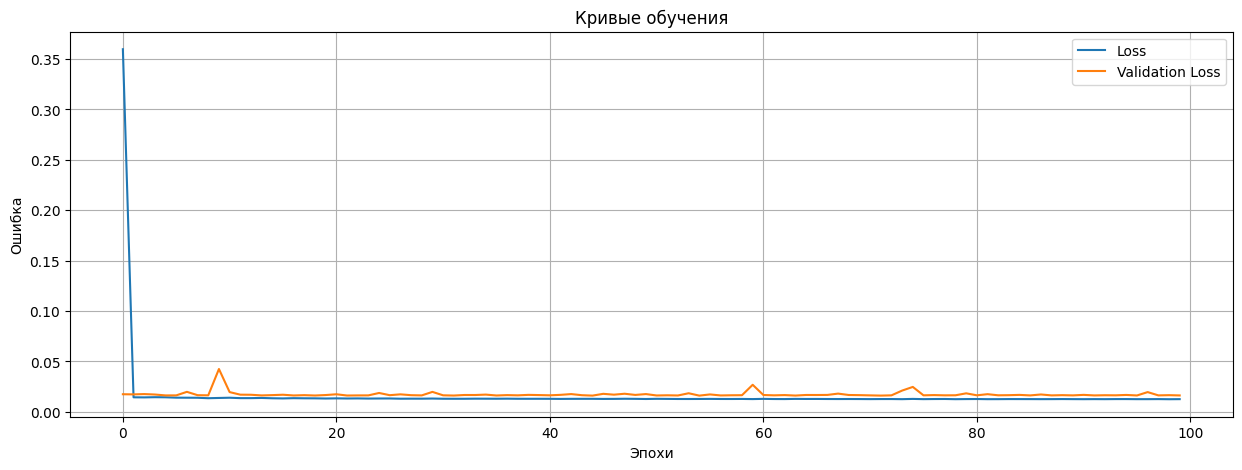

In [11]:
plt.rcParams["figure.figsize"] = [15, 5]

def plot_loss(history):
  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Кривые обучения')
  plt.xlabel('Эпохи')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

plot_loss(history)

Визуализируем точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом):

4/4 [==============================] - 0s 4ms/step


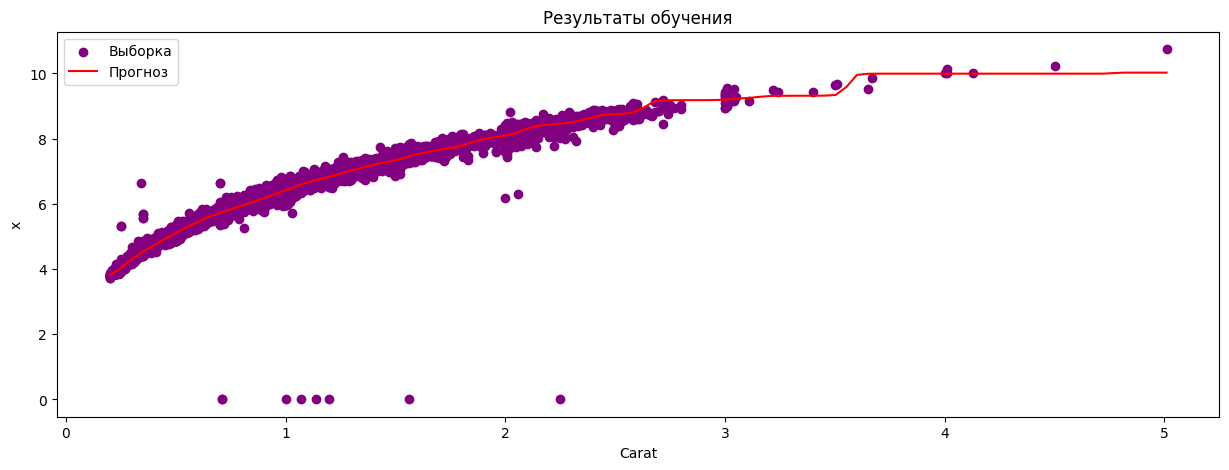

In [12]:
plt.scatter(df['carat'], df['x'], color='purple', label='Выборка')

X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.plot(X_range, y_range_pred, color='red', label='Прогноз')

plt.xlabel('Carat')
plt.ylabel('x')
plt.title('Результаты обучения')
plt.legend()
plt.grid(False)

plt.show()

Определим в исходном наборе данных признак (отличный от независимого и зависимого признаков),
принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании:

In [13]:
print("Признак с минимальной ковариацией:", min_covariance_feature)

Признак с минимальной ковариацией: clarity


Визуализируем этот признак в соответствии с индивидуальным заданием:

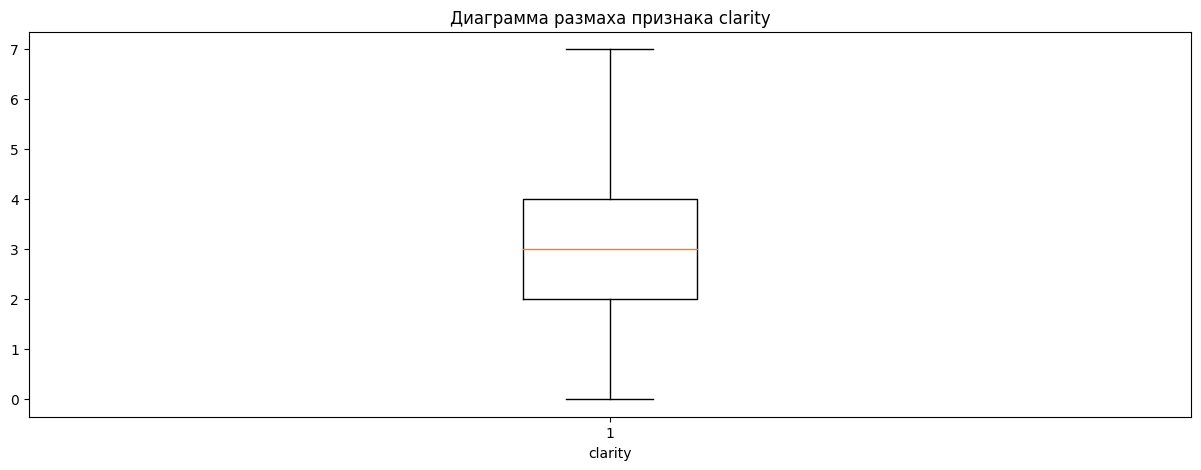

In [14]:
additional_feature = df[min_covariance_feature]

plt.boxplot(additional_feature)
plt.xlabel(min_covariance_feature)
plt.title("Диаграмма размаха признака clarity")
plt.grid(False)

plt.show()

Сформируйем набор входных данных из двух признаков набора данных (независимый признак и определенный
признак), создадим и адаптируем нормализующий слой Tensorflow для двух признаков:

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [16]:
X = df["carat"].values.reshape(-1, 1)
y = df["x"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Используя созданный нормализующий слой, построим нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучим ее на наборе данных из двух признаков и отклика:

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['mean_absolute_error'])
history = model.fit(X_normalized, y, epochs=100, verbose=0)

In [18]:
y_pred = model.predict(X_normalized)
r2 = r2_score(y, y_pred)

print("R^2 Score:", r2)
print("MSE:", mean_squared_error(y, y_pred))

1686/1686 [==============================] - 3s 2ms/step
R^2 Score: 0.9898361121752526
MSE: 0.012789462


Визуализируем набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве:

In [19]:
from mpl_toolkits.mplot3d import Axes3D

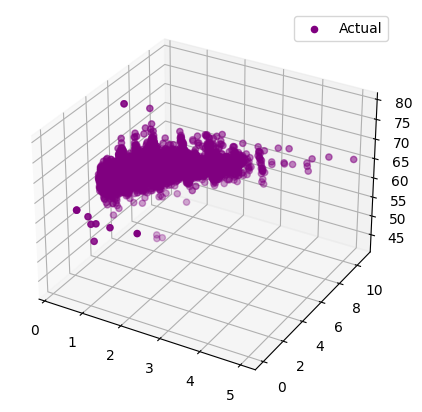

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["carat"], df["x"], df["depth"], c='purple', label='Actual')
ax.legend()
plt.show()

In [21]:
carat_range = np.linspace(df["carat"].min(), df["carat"].max(), 100)
depth_range = np.linspace(df["depth"].min(), df["depth"].max(), 100)

carat_mesh, depth_mesh = np.meshgrid(carat_range, depth_range)
carat_mesh_normalized = scaler.transform(carat_mesh.reshape(-1, 1)).reshape(carat_mesh.shape)
carat_mesh_normalized = carat_mesh_normalized.reshape(-1, 1)

x_pred = model.predict(carat_mesh_normalized)
x_pred = x_pred.reshape(carat_mesh.shape)

313/313 [==============================] - 1s 3ms/step


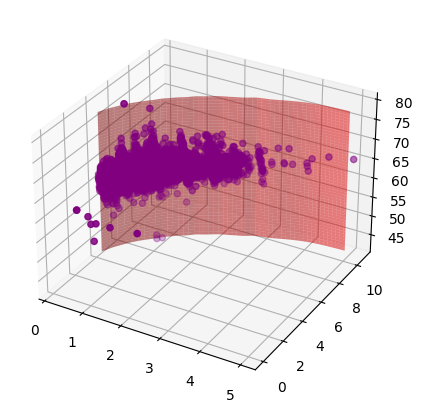

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["carat"], df["x"], df["depth"], c='purple', label='')
ax.plot_surface(carat_mesh, x_pred, depth_mesh, alpha=0.5, color='r', label='')

plt.show()

Разобьём набор данных из двух признаков и отклика на обучающую и тестовую выборки и построим кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке:

In [47]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from IPython.display import clear_output

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [49]:
X = df[['carat', 'x']]
y = df.clarity
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X)

In [52]:
print(y_train.shape)

(40455,)


In [53]:
def progress(i, end):
    clear_output(wait=True)
    print('Progress: %d/%d' % (i, end), end='')

train_score = []
test_score = []
STEP = 8000

end = y_train.shape[0]
start = STEP + end % STEP

for i in range(start, end + 1, STEP):
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)
  ])

  model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['mean_absolute_error']
  )

  model.fit(X, y, epochs=64, verbose=0)
  train_score.append(mean_squared_error(y_train[:i], model.predict(X_train[:i], verbose=0)))

  test_score.append(mean_squared_error(y_test, model.predict(X_test, verbose=0)))

  progress(i, end)

Progress: 40455/40455

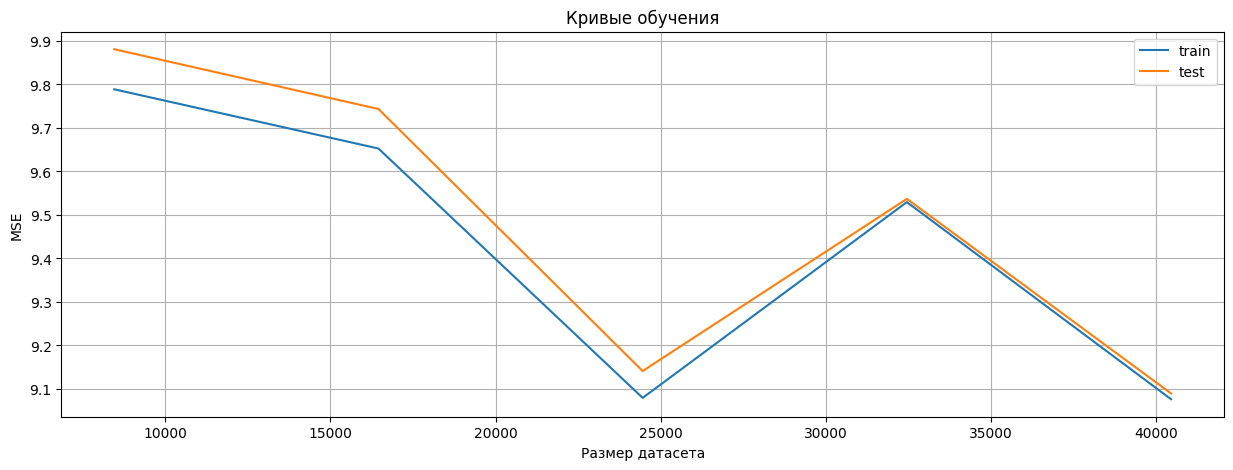

In [54]:
x_plt = [i for i in range(start, end + 1, STEP)]

plt.plot(x_plt, train_score, label="train")
plt.plot(x_plt, test_score, label="test")

plt.legend(); plt.title('Кривые обучения')
plt.xlabel('Размер датасета')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.show()